In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Reshape,InputLayer,GlobalAveragePooling2D,DepthwiseConv2D,Dropout,MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools

In [2]:
import os
#os.chdir('data')
print(os.getcwd())

c:\Users\HP\Documents\GitHub\CNN-ON-FPGA-MSc.-\Training Model(Python)


In [3]:
#os.chdir('Dataset')
os.chdir('UCMerced_LandUse')
train_path='train'
test_path='test'
valid_path='valid'
print(train_path)
#os.mkdir('valid')


train


In [4]:
valid_path='valid'

In [5]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size=(256,256),batch_size=64)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,target_size=(256,256),batch_size=28)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(256,256),batch_size=28,shuffle=False)


Found 1680 images belonging to 21 classes.
Found 210 images belonging to 21 classes.
Found 210 images belonging to 21 classes.


In [10]:
import sys
from PIL import Image
sys.modules['Image'] = Image 


In [11]:
import Image 


In [13]:
def prepare_image(file):
    img_path='train/'
    img=image.load_img(img_path+file,target_size=(256,256))
    img_arr=image.img_to_array(img)
    img_expnd=np.expand_dims(img_arr,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_expnd)


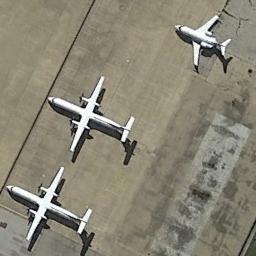

In [15]:
from IPython.display import Image
Image(filename='train/airplane/airplane_001.jpg',width=300,height=200)

In [6]:
mobile=tf.keras.applications.mobilenet.MobileNet()


In [7]:
mobmod=Sequential()
mobmod.add(InputLayer(shape=(256,256,3)))
for layer in mobile.layers[1:86]:
    mobmod.add(layer)
mobmod.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [8]:
mobmod.add(GlobalAveragePooling2D())



In [10]:
mobmod.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [11]:
mobmod.add(Dense(units=21,activation='softmax'))


In [12]:
mobmod.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             

 Total params: 3,250,389 (12.40 MB)

 Trainable params: 3,228,501 (12.32 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [13]:
mobmod.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
mobmod.fit(x=train_batches,validation_data=valid_batches,epochs=20,verbose=2)


Epoch 1/20


c:\Users\HP\Documents\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 - 344s - 13s/step - accuracy: 0.2899 - loss: 3.2454 - val_accuracy: 0.0476 - val_loss: 26.0442
Epoch 2/20
27/27 - 297s - 11s/step - accuracy: 0.5244 - loss: 1.4935 - val_accuracy: 0.0476 - val_loss: 30.6093
Epoch 3/20
27/27 - 299s - 11s/step - accuracy: 0.6726 - loss: 1.0517 - val_accuracy: 0.0476 - val_loss: 35.7954
Epoch 4/20
27/27 - 272s - 10s/step - accuracy: 0.7577 - loss: 0.7690 - val_accuracy: 0.1048 - val_loss: 23.3232
Epoch 5/20
27/27 - 240s - 9s/step - accuracy: 0.8351 - loss: 0.5250 - val_accuracy: 0.0714 - val_loss: 27.9924
Epoch 6/20
27/27 - 244s - 9s/step - accuracy: 0.8708 - loss: 0.4133 - val_accuracy: 0.0619 - val_loss: 20.9476
Epoch 7/20
27/27 - 255s - 9s/step - accuracy: 0.8738 - loss: 0.3562 - val_accuracy: 0.1714 - val_loss: 22.0442
Epoch 8/20
27/27 - 242s - 9s/step - accuracy: 0.9125 - loss: 0.2642 - val_accuracy: 0.1905 - val_loss: 22.6767
Epoch 9/20
27/27 - 222s - 8s/step - accuracy: 0.9286 - loss: 0.2531 - val_accuracy: 0.2524 - val_loss: 18.3915
Epoch 10

In [23]:
from tensorflow.keras.applications import imagenet_utils

preproc=prepare_image('airplane/airplane_001.jpg')
predictions=mobmod.predict(preproc)
results=imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


[[('n02690373', 'airliner', 0.21581939),
  ('n04552348', 'warplane', 0.18815592),
  ('n04008634', 'projectile', 0.13327375),
  ('n03773504', 'missile', 0.12741336),
  ('n04592741', 'wing', 0.061923455)]]

In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [23]:
for i, layer in enumerate(mobile.layers):
    print(f"Layer {i}: {layer.name}")


Layer 0: input_layer
Layer 1: conv1
Layer 2: conv1_bn
Layer 3: conv1_relu
Layer 4: conv_dw_1
Layer 5: conv_dw_1_bn
Layer 6: conv_dw_1_relu
Layer 7: conv_pw_1
Layer 8: conv_pw_1_bn
Layer 9: conv_pw_1_relu
Layer 10: conv_pad_2
Layer 11: conv_dw_2
Layer 12: conv_dw_2_bn
Layer 13: conv_dw_2_relu
Layer 14: conv_pw_2
Layer 15: conv_pw_2_bn
Layer 16: conv_pw_2_relu
Layer 17: conv_dw_3
Layer 18: conv_dw_3_bn
Layer 19: conv_dw_3_relu
Layer 20: conv_pw_3
Layer 21: conv_pw_3_bn
Layer 22: conv_pw_3_relu
Layer 23: conv_pad_4
Layer 24: conv_dw_4
Layer 25: conv_dw_4_bn
Layer 26: conv_dw_4_relu
Layer 27: conv_pw_4
Layer 28: conv_pw_4_bn
Layer 29: conv_pw_4_relu
Layer 30: conv_dw_5
Layer 31: conv_dw_5_bn
Layer 32: conv_dw_5_relu
Layer 33: conv_pw_5
Layer 34: conv_pw_5_bn
Layer 35: conv_pw_5_relu
Layer 36: conv_pad_6
Layer 37: conv_dw_6
Layer 38: conv_dw_6_bn
Layer 39: conv_dw_6_relu
Layer 40: conv_pw_6
Layer 41: conv_pw_6_bn
Layer 42: conv_pw_6_relu
Layer 43: conv_dw_7
Layer 44: conv_dw_7_bn
Layer 45: 

In [5]:
model=Sequential()
model.add(InputLayer(shape=(256, 256, 3)))



In [6]:
for layer in mobile.layers[1:43]:
     if isinstance(layer, Conv2D):
        
        print(f'Layer {layer.name} is a Conv2D layer with {layer.filters} filters')
        newfilters=(int)(layer.filters/2)
        newlayer=Conv2D(newfilters, layer.kernel_size, strides=layer.strides,
                      padding=layer.padding, activation=layer.activation,
                      use_bias=layer.use_bias, kernel_initializer=layer.kernel_initializer,
                      bias_initializer=layer.bias_initializer)
        model.add(newlayer)
        print(f'Layer {newlayer.name} is a Conv2D layer with {newlayer.filters} filters')
     elif isinstance(layer, BatchNormalization) :
        model.add(BatchNormalization(axis=getattr(layer, 'axis', -1),
    momentum=getattr(layer, 'momentum', 0.99),
    epsilon=getattr(layer, 'epsilon', 1e-3),
    center=getattr(layer, 'center', True),
    scale=getattr(layer, 'scale', True),
    beta_initializer=getattr(layer, 'beta_initializer', 'zeros'),
    gamma_initializer=getattr(layer, 'gamma_initializer', 'ones'),
    moving_mean_initializer=getattr(layer, 'moving_mean_initializer', 'zeros'),
    moving_variance_initializer=getattr(layer, 'moving_variance_initializer', 'ones'),
    beta_regularizer=getattr(layer, 'beta_regularizer', None),
    gamma_regularizer=getattr(layer, 'gamma_regularizer', None),
    beta_constraint=getattr(layer, 'beta_constraint', None),
    gamma_constraint=getattr(layer, 'gamma_constraint', None)))
     elif isinstance(layer,DepthwiseConv2D):
         model.add(DepthwiseConv2D(kernel_size=getattr(layer, 'kernel_size', (3, 3)),
    strides=getattr(layer, 'strides', (1, 1)),
    padding=getattr(layer, 'padding', 'valid'),
    depth_multiplier=getattr(layer, 'depth_multiplier', 1),
    activation=getattr(layer, 'activation', None),
    use_bias=getattr(layer, 'use_bias', True),
    bias_initializer=getattr(layer, 'bias_initializer', 'zeros'),
    depthwise_initializer=getattr(layer, 'depthwise_initializer', 'glorot_uniform')
))
     else:
         model.add(layer)

   

NameError: name 'mobile' is not defined

In [9]:
for layer in mobile.layers[73:86]:
     if isinstance(layer, Conv2D):
        
        print(f'Layer {layer.name} is a Conv2D layer with {layer.filters} filters')
        newfilters=(int)(layer.filters/2)
        newlayer=Conv2D(newfilters, layer.kernel_size, strides=layer.strides,
                      padding=layer.padding, activation=layer.activation,
                      use_bias=layer.use_bias, kernel_initializer=layer.kernel_initializer,
                      bias_initializer=layer.bias_initializer)
        model.add(newlayer)
        print(f'Layer {newlayer.name} is a Conv2D layer with {newlayer.filters} filters')
     elif isinstance(layer, BatchNormalization) :
        model.add(BatchNormalization(axis=getattr(layer, 'axis', -1),
    momentum=getattr(layer, 'momentum', 0.99),
    epsilon=getattr(layer, 'epsilon', 1e-3),
    center=getattr(layer, 'center', True),
    scale=getattr(layer, 'scale', True),
    beta_initializer=getattr(layer, 'beta_initializer', 'zeros'),
    gamma_initializer=getattr(layer, 'gamma_initializer', 'ones'),
    moving_mean_initializer=getattr(layer, 'moving_mean_initializer', 'zeros'),
    moving_variance_initializer=getattr(layer, 'moving_variance_initializer', 'ones'),
    beta_regularizer=getattr(layer, 'beta_regularizer', None),
    gamma_regularizer=getattr(layer, 'gamma_regularizer', None),
    beta_constraint=getattr(layer, 'beta_constraint', None),
    gamma_constraint=getattr(layer, 'gamma_constraint', None)))
     elif isinstance(layer,DepthwiseConv2D):
         model.add(DepthwiseConv2D(kernel_size=getattr(layer, 'kernel_size', (3, 3)),
    strides=getattr(layer, 'strides', (1, 1)),
    padding=getattr(layer, 'padding', 'valid'),
    depth_multiplier=getattr(layer, 'depth_multiplier', 1),
    activation=getattr(layer, 'activation', None),
    use_bias=getattr(layer, 'use_bias', True),
    bias_initializer=getattr(layer, 'bias_initializer', 'zeros'),
    depthwise_initializer=getattr(layer, 'depthwise_initializer', 'glorot_uniform')
))
     else:
         model.add(layer)

   

Layer conv_pw_12 is a Conv2D layer with 1024 filters
Layer conv2d_7 is a Conv2D layer with 512 filters
Layer conv_pw_13 is a Conv2D layer with 1024 filters
Layer conv2d_8 is a Conv2D layer with 512 filters


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 128, 128, 16)   │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 64, 64, 64)     │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │         4,096 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 480,096 (1.83 MB)

 Trainable params: 474,272 (1.81 MB)

 Non-trainable params: 5,824 (22.75 KB)

In [11]:
model.add(GlobalAveragePooling2D(name='global_average_pooling2d'))
#model.add(Dropout(rate=0.01, name='dropout'))


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 128, 128, 16)   │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 64, 64, 64)     │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │         4,096 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 480,096 (1.83 MB)

 Trainable params: 474,272 (1.81 MB)

 Non-trainable params: 5,824 (22.75 KB)

In [13]:
model.add(Dense(units=21,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 128, 128, 16)   │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 64, 64, 64)     │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │         4,096 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 490,869 (1.87 MB)

 Trainable params: 485,045 (1.85 MB)

 Non-trainable params: 5,824 (22.75 KB)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)


Epoch 1/10
60/60 - 123s - 2s/step - accuracy: 0.5137 - loss: 1.4988 - val_accuracy: 0.0476 - val_loss: 3.7086
Epoch 2/10
60/60 - 103s - 2s/step - accuracy: 0.6167 - loss: 1.1614 - val_accuracy: 0.0476 - val_loss: 4.1587
Epoch 3/10
60/60 - 109s - 2s/step - accuracy: 0.7012 - loss: 0.9527 - val_accuracy: 0.0476 - val_loss: 4.7970
Epoch 4/10
60/60 - 101s - 2s/step - accuracy: 0.7554 - loss: 0.7695 - val_accuracy: 0.0476 - val_loss: 5.6090
Epoch 5/10
60/60 - 98s - 2s/step - accuracy: 0.7988 - loss: 0.6483 - val_accuracy: 0.0476 - val_loss: 6.1215
Epoch 6/10
60/60 - 97s - 2s/step - accuracy: 0.8333 - loss: 0.5278 - val_accuracy: 0.0476 - val_loss: 6.8788
Epoch 7/10
60/60 - 97s - 2s/step - accuracy: 0.8827 - loss: 0.4130 - val_accuracy: 0.0476 - val_loss: 8.5549
Epoch 8/10
60/60 - 96s - 2s/step - accuracy: 0.8929 - loss: 0.3671 - val_accuracy: 0.0619 - val_loss: 7.1089
Epoch 9/10
60/60 - 101s - 2s/step - accuracy: 0.9101 - loss: 0.3156 - val_accuracy: 0.2619 - val_loss: 3.9501
Epoch 10/10
60

In [46]:
import matplotlib.pyplot as plt

def plot_conf_matrix(cm,classes,normalize=False,title='confusionmatrix',cmap=plt.cm.Blues):
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')


In [44]:
predictions=model.predict(x=test_batches,verbose=0)
rounded_pred=np.round(predictions)


In [46]:
from sklearn.metrics import confusion_matrix
test_labels=test_batches.classes
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_pred.argmax(axis=1))
cm_plot_labels=[]
for item in os.listdir('train'):
   cm_plot_labels.append(item)
print(cm_plot_labels)


['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'medium_residential', 'mobile_home_park', 'mountain', 'overpass', 'palace', 'parking_lot', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'roundabout', 'runway', 'sea_ice', 'ship', 'snowberg', 'sparse_residential', 'stadium', 'storage_tank', 'tennis_court', 'terrace', 'thermal_power_station', 'wetland']


In [47]:
predict=np.argmax(rounded_pred,axis=1)
print(predict)
print(test_labels)

[ 0  0  3 ... 34  0 31]
[ 0  0  0 ... 44 44 44]


In [48]:
from sklearn.metrics import f1_score,accuracy_score
f1_micro = f1_score(test_labels, predict,average='micro')
f1_micro

0.37444444444444447

In [49]:
accuracy_score(test_labels,predict)

0.37444444444444447

In [10]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model

In [45]:
def residualblock(input,numfilters,stride):
    layer1=Conv2D(strides=stride,filters=numfilters,kernel_size=(3,3),padding='same')(input)
    layer2=BatchNormalization()(layer1)
    layer3=ReLU()(layer2)
    layer4=Conv2D(strides=1,filters=numfilters,kernel_size=(3,3),padding='same')(layer3)
    layer5=BatchNormalization()(layer4)
    print(f'before{input.shape}')
    if stride!=1:
        input=Conv2D(strides=stride,filters=numfilters,kernel_size=(1,1),padding='same')(input)
        input=BatchNormalization()(input)
        print(f'after{input.shape}')
    layer6=Add()([layer5,input])
    out=ReLU()(layer6)
    return out

In [47]:
def ResNet34():
    X_input = Input((256,256,3))
    X = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(X_input)
    X = BatchNormalization()(X)
    X = ReLU()(X)
    X = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(X)
    for i in range(0,3):
        X=residualblock(X,64,1)
    X=residualblock(X,128,2)
    for i in range(0,3):
        X=residualblock(X,128,1)
    X=residualblock(X,256,2)
    for i in range(0,5):
        X=residualblock(X,256,1)
    X=residualblock(X,512,2)
    for i in range(0,2):
        X=residualblock(X,512,1)
    X = AveragePooling2D(pool_size=(7, 7))(X)

    X = Flatten()(X)
    X = Dense(45, activation='softmax')(X)
    model=Model(inputs=X_input, outputs=X)
    return model

In [53]:
model=ResNet34()
model.summary()

before(None, 64, 64, 64)
before(None, 64, 64, 64)
before(None, 64, 64, 64)
before(None, 64, 64, 64)
after(None, 32, 32, 128)
before(None, 32, 32, 128)
before(None, 32, 32, 128)
before(None, 32, 32, 128)
before(None, 32, 32, 128)
after(None, 16, 16, 256)
before(None, 16, 16, 256)
before(None, 16, 16, 256)
before(None, 16, 16, 256)
before(None, 16, 16, 256)
before(None, 16, 16, 256)
before(None, 16, 16, 256)
after(None, 8, 8, 512)
before(None, 8, 8, 512)
before(None, 8, 8, 512)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_215 (Conv2D) │ (None, 128, 128,  │      9,472 │ input_layer_12[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_215[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_184 (ReLU)    │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 64, 64,    │          0 │ re_lu_184[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_216 (Conv2D) │ (None, 64, 64,    │     36,928 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_216[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_185 (ReLU)    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_217 (Conv2D) │ (None, 64, 64,    │     36,928 │ re_lu_185[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_217[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_90 (Add)        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_186 (ReLU)    │ (None, 64, 64,    │          0 │ add_90[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_218 (Conv2D) │ (None, 64, 64,    │     36,928 │ re_lu_186[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_218[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_187 (ReLU)    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_219 (Conv2D) │ (None, 64, 64,    │     36,928 │ re_lu_187[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_219[0][0]

 Total params: 21,333,293 (81.38 MB)

 Trainable params: 21,316,269 (81.32 MB)

 Non-trainable params: 17,024 (66.50 KB)

In [54]:
model.compile(optimizer=Adam(learning_rate=0.06),loss='categorical_crossentropy',metrics=['accuracy'])


In [55]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)


Epoch 1/15


c:\Users\HP\Documents\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [12]:
from keras.applications import ResNet50


In [13]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
count=0
for layer in base_model.layers:
    if(isinstance(layer,Conv2D)):
        filters=layer.filters/4
        print(f'{layer.kernel_size} and {layer.filters}')
#print(count)
        

(7, 7) and 64
(1, 1) and 64
(3, 3) and 64
(1, 1) and 256
(1, 1) and 256
(1, 1) and 64
(3, 3) and 64
(1, 1) and 256
(1, 1) and 64
(3, 3) and 64
(1, 1) and 256
(1, 1) and 128
(3, 3) and 128
(1, 1) and 512
(1, 1) and 512
(1, 1) and 128
(3, 3) and 128
(1, 1) and 512
(1, 1) and 128
(3, 3) and 128
(1, 1) and 512
(1, 1) and 128
(3, 3) and 128
(1, 1) and 512
(1, 1) and 256
(3, 3) and 256
(1, 1) and 1024
(1, 1) and 1024
(1, 1) and 256
(3, 3) and 256
(1, 1) and 1024
(1, 1) and 256
(3, 3) and 256
(1, 1) and 1024
(1, 1) and 256
(3, 3) and 256
(1, 1) and 1024
(1, 1) and 256
(3, 3) and 256
(1, 1) and 1024
(1, 1) and 256
(3, 3) and 256
(1, 1) and 1024
(1, 1) and 512
(3, 3) and 512
(1, 1) and 2048
(1, 1) and 2048
(1, 1) and 512
(3, 3) and 512
(1, 1) and 2048
(1, 1) and 512
(3, 3) and 512
(1, 1) and 2048
